The objective of this file is to create a pipeline to train an XGBoost model on any given set of X features and y labels.

In [1]:
%load_ext cuml.accel

cuML: Accelerator installed.


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [3]:
X = []
y = []

with open("/home/tyler/gdrive/K-pop Project 2024-5/K-pop Project/ML_inputs/features.pkl", 'rb') as f:
    X = pickle.load(f)
with open('/home/tyler/gdrive/K-pop Project 2024-5/K-pop Project/ML_inputs/gen_labels.pkl', 'rb') as f:
    y = pickle.load(f)

# Convert lists to numpy arrays after processing all files
X = np.array(X)  # Convert to numpy array
y = np.array(y)  # Convert to numpy array

In [4]:
def run_XGBoost(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features using StandardScaler
    scaler = StandardScaler() 
    X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform
    X_test = scaler.transform(X_test)  # Only transform the test data

    # Label encode the genre labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)  # Converts genre names to numeric labels
    y_test_encoded = label_encoder.transform(y_test)

    model = XGBClassifier(use_label_encoder=None, eval_metric='mlogloss')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5)  # Using 5-fold cross-validation
    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

    # Fit the model on the full training set after cross-validation
    model.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Decode predictions back to genre names
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print classification report
    print(classification_report(y_test_encoded, y_pred, target_names= [str(generation) for generation in label_encoder.classes_]))

    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix: Actual vs Predicted')
    plt.show()

    # Plot Feature Importance
    plt.figure(figsize=(12, 10))
    plot_importance(model, max_num_features=10, importance_type='weight')  # Adjust max_num_features as needed
    plt.title('Feature Importance')
    plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform
X_test = scaler.transform(X_test)  # Only transform the test data

# Label encode the genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts genre names to numeric labels
y_test_encoded = label_encoder.transform(y_test)

In [7]:
model = XGBClassifier(use_label_encoder=None, eval_metric='mlogloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5)  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode predictions back to genre names
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

Cross-Validation Scores: [0.70700046 0.70885489 0.71566014 0.71960125 0.72029674]
Mean Cross-Validation Score: 0.71


Accuracy: 0.72
              precision    recall  f1-score   support

           1       0.75      0.76      0.75      2701
           2       0.70      0.75      0.73      3653
           3       0.71      0.74      0.72      3154
           4       0.78      0.50      0.61      1197
           5       1.00      0.28      0.43        80

    accuracy                           0.72     10785
   macro avg       0.79      0.61      0.65     10785
weighted avg       0.73      0.72      0.72     10785



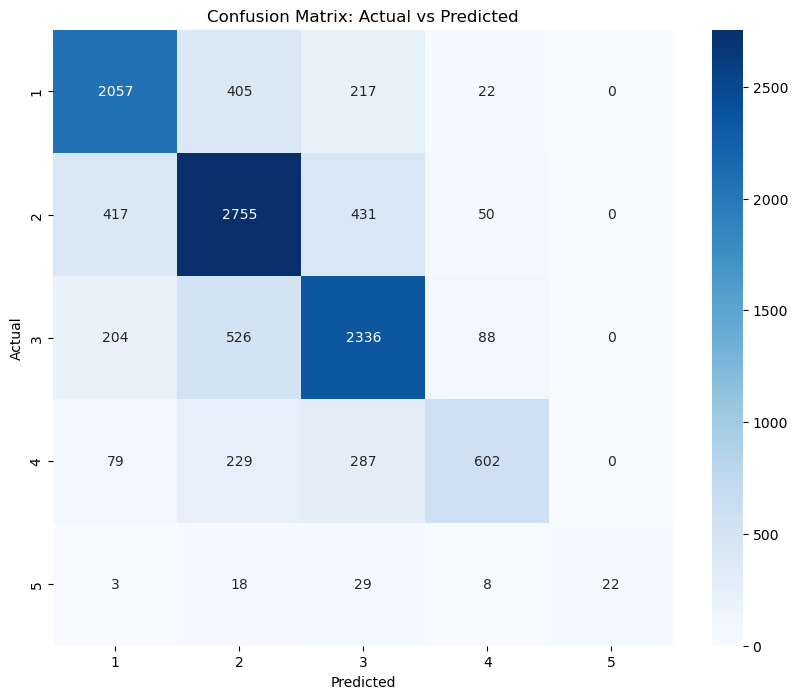

<Figure size 1200x1000 with 0 Axes>

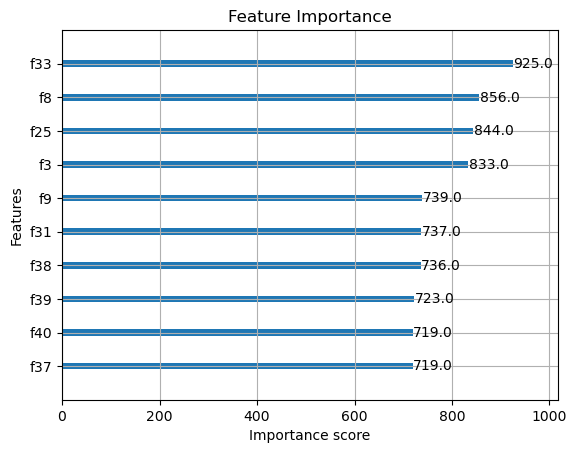

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test_encoded, y_pred, target_names= [str(generation) for generation in label_encoder.classes_]))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

# Plot Feature Importance
plt.figure(figsize=(12, 10))
plot_importance(model, max_num_features=10, importance_type='weight')  # Adjust max_num_features as needed
plt.title('Feature Importance')
plt.show()

In [9]:
def int_to_company(num: int):
    if num == 7:
        return 'JYP'
    elif num == 9:
        return 'SM'
    elif num == 11:
        return 'YG'

Cross-Validation Scores: [0.76703755 0.76553083 0.77164715 0.76677872 0.76677872]
Mean Cross-Validation Score: 0.77
Accuracy: 0.78
              precision    recall  f1-score   support

         JYP       0.76      0.64      0.70      3055
          SM       0.77      0.88      0.83      5626
          YG       0.82      0.69      0.75      2104

    accuracy                           0.78     10785
   macro avg       0.79      0.74      0.76     10785
weighted avg       0.78      0.78      0.78     10785



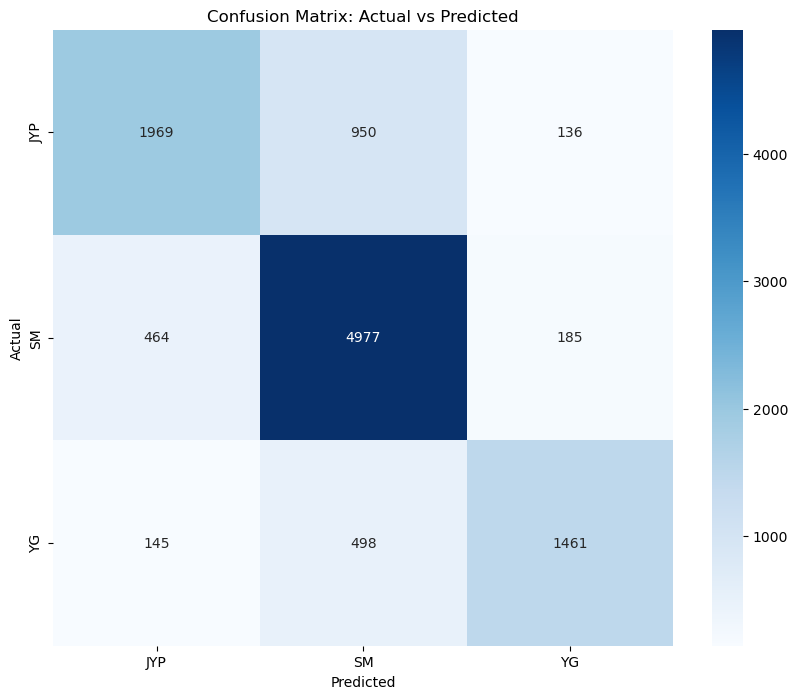

<Figure size 1200x1000 with 0 Axes>

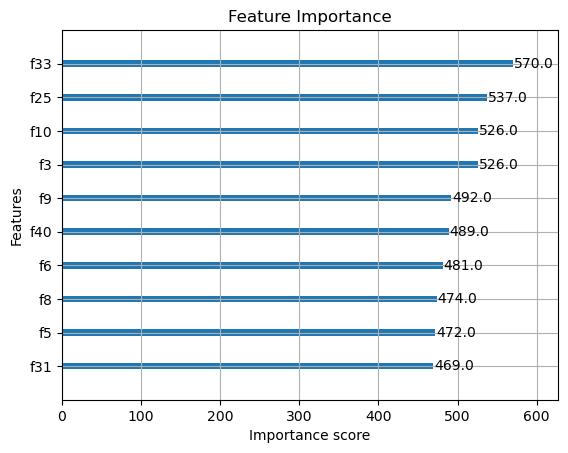

In [10]:
with open('/home/tyler/gdrive/K-pop Project 2024-5/K-pop Project/ML_inputs/company_labels.pkl', 'rb') as f:
    y = pickle.load(f)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform
X_test = scaler.transform(X_test)  # Only transform the test data

# Label encode the genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts genre names to numeric labels
y_test_encoded = label_encoder.transform(y_test)

model = XGBClassifier(use_label_encoder=None, eval_metric='mlogloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5)  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode predictions back to genre names
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test_encoded, y_pred, target_names= [int_to_company(company) for company in label_encoder.classes_]))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[int_to_company(company) for company in label_encoder.classes_], yticklabels=[int_to_company(company) for company in label_encoder.classes_])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

# Plot Feature Importance
plt.figure(figsize=(12, 10))
plot_importance(model, max_num_features=10, importance_type='weight')  # Adjust max_num_features as needed
plt.title('Feature Importance')
plt.show()